In [290]:
#! /usr/bin/env python3
'''===============================================================================================================
 - Author: M. Guesmi
 - Adress: Chair of process engineering TU Dresden, George-Bähr-Straße 3b, 01069 Dresden, Germany
 - Summary: test different machine learning models to classfiy flow pattern based on operational and geometrical features 
=================================================================================================================='''

'===============================================================================================================\n - Author: M. Guesmi\n - Adress: Chair of process engineering TU Dresden, George-Bähr-Straße 3b, 01069 Dresden, Germany\n - Summary: test different machine learning models to classfiy flow pattern based on operational and geometrical features \n=================================================================================================================='

In [291]:

#!python -m pip install --upgrade pip
#!python -m pip install seaborn==0.13.0
# only if xgboost was not installed yet
#!python -m pip install xgboost==2.0.0
#!python -m pip uninstall -y numpy scipy scikit-learn imbalanced-learn
#!python -m pip install numpy==1.23.5 scipy==1.7.3 scikit-learn==1.3.1 imbalanced-learn==0.11.0



In [292]:
import numpy
import os
import scipy
import sklearn
import imblearn

print(f"NumPy version: {numpy.__version__}")
print(f"SciPy version: {scipy.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"imbalanced-learn version: {imblearn.__version__}")


NumPy version: 1.22.4
SciPy version: 1.7.3
scikit-learn version: 1.3.1
imbalanced-learn version: 0.11.0


In [293]:
# 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


# ML-Models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Evaluation metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
# 
from sklearn.feature_selection import mutual_info_classif

# Calculate Mutual Information
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame for easier plotting

from sklearn.preprocessing import LabelBinarizer
import pickle
# Output, Display
from tabulate import tabulate
from IPython.display import display, HTML
# import joblib to import model to file
import joblib

In [294]:
# Use LaTeX and set the default font to Computer Modern Roman
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

In [295]:
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)
# Ignore the UserWarning
warnings.filterwarnings("ignore", category=UserWarning)


# Ignore all warnings
#warnings.filterwarnings('ignore')

In [296]:
df = pd.read_csv('training_test_data.csv',sep=',')


In [297]:
df.describe()

,Vsl,Vsg,DenL,DenG,VisL,VisG,ST,ID,Ang,Flow_label
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3.523000e+03,3523.000000,3523.000000,3523.000000,3523.000000
mean,0.902791,6.836029,963.239290,3.705230,0.012039,1.317070e-05,0.065915,0.046693,0.333272,2.458132
std,1.351430,13.410838,146.653889,6.519686,0.071802,4.577323e-06,0.013631,0.025207,4.193035,1.035510
min,0.000241,0.014967,77.041602,0.125000,0.000012,5.070000e-07,0.015000,0.008740,-10.000000,0.000000
25%,0.033713,0.400000,1000.000000,1.180000,0.001000,1.500000e-05,0.070000,0.025000,0.000000,2.000000
50%,0.250000,1.969150,1000.000000,1.180000,0.001000,1.500000e-05,0.070000,0.051000,0.250000,3.000000
75%,1.012195,10.000000,1000.000000,1.180000,0.001000,1.500000e-05,0.070000,0.051000,1.030000,3.000000
max,6.475590,200.609756,1000.000000,26.900000,0.483000,1.900000e-05,0.070000,0.106400,10.000000,4.000000


In [298]:
df

,Author,Vsl,Vsg,DenL,DenG,VisL,VisG,ST,ID,Ang,Flow_label
0,1985_Piu-,0.044817,0.814024,1000.0,1.12,0.001,0.000015,0.07,0.0254,0.0,1
1,1985_Piu-,0.060976,0.814024,1000.0,1.12,0.001,0.000015,0.07,0.0254,0.0,3
2,1985_Piu-,0.088110,0.814024,1000.0,1.12,0.001,0.000015,0.07,0.0254,0.0,3
3,1985_Piu-,0.060976,1.103659,1000.0,1.12,0.001,0.000015,0.07,0.0254,0.0,3
4,1985_Piu-,0.121951,1.103659,1000.0,1.12,0.001,0.000015,0.07,0.0254,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
3518,1982_Ovad,1.500000,15.000000,1000.0,1.18,0.001,0.000015,0.07,0.0250,-10.0,3
3519,1982_Ovad,0.600000,25.000000,1000.0,1.18,0.001,0.000015,0.07,0.0250,-10.0,3
3520,1982_Ovad,1.000000,25.000000,1000.0,1.18,0.001,0.000015,0.07,0.0250,-10.0,3
3521,1982_Ovad,1.500000,25.000000,1000.0,1.18,0.001,0.000015,0.07,0.0250,-10.0,3


Correlation between Vsl and Flow Pattern: 0.5659112402624235
Correlation between Vsg and Flow Pattern: -0.12885307242413216
Correlation between DenL and Flow Pattern: -0.019858160134815034
Correlation between DenG and Flow Pattern: 0.1333701306814368
Correlation between VisL and Flow Pattern: 0.0026341204959098126
Correlation between VisG and Flow Pattern: -0.12990230323786767
Correlation between ID and Flow Pattern: 0.1357908180811833
Correlation between Ang and Flow Pattern: 0.27219734378163346


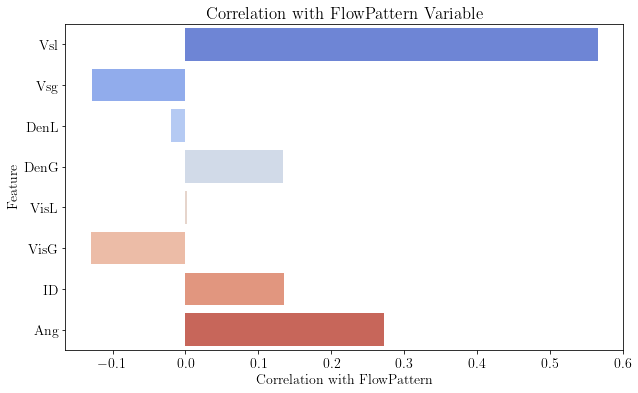

In [299]:
# Calculate the correlation between each feature and the Flow pattern
correlation_df = pd.DataFrame(columns=['Feature', 'Correlation with FlowPattern'])

#for feature in df.drop(columns=['Author', 'Flow_label']).columns:
for feature in df.drop(columns=['Author', 'ST','Flow_label']).columns:
    #correlation    = df[feature].corr(df['Flow_label'])
    correlation = df[feature].corr(df['Flow_label'])
    print(f"Correlation between {feature} and Flow Pattern: {correlation}")
    correlation_df = pd.concat([correlation_df, pd.DataFrame({'Feature': [feature], 'Correlation with FlowPattern': [correlation]})], ignore_index=True)

# Generate a bar plot to visualize the correlation with the Flow pattern
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation with FlowPattern', y='Feature', data=correlation_df, palette='coolwarm')
plt.title('Correlation with FlowPattern Variable')
plt.show()

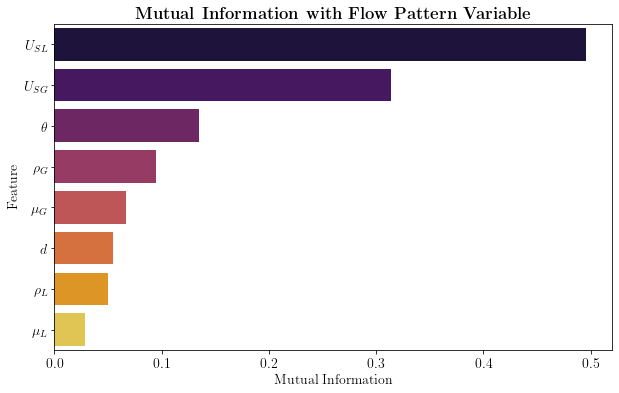

In [300]:

# Assuming df is your DataFrame and 'Flow_label' is your target variable
X = df.drop(columns=['Author', 'ST', 'Flow_label'])
y = df['Flow_label']

# Calculate Mutual Information
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame for easier plotting
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})

# Sort the DataFrame by Mutual Information scores
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Create a dictionary that maps the original feature names to their LaTeX-style labels
latex_labels = {
    'Vsl': r'$U_{SL}$',
    'Vsg': r'$U_{SG}$',
    'DenL': r'$\rho_L$',
    'DenG': r'$\rho_G$',
    'VisL': r'$\mu_L$',
    'VisG': r'$\mu_G$',
    'ST': r'$ST$',
    'ID': r'$d$',
    'Ang': r'$\theta$',
    'Flow_label': r'$Flow\_label$'
}

# Replace the feature names with their LaTeX-style labels
mi_df['Feature'] = mi_df['Feature'].map(latex_labels)
# Set the font size
plt.rcParams['font.size'] = 14
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette='inferno')
plt.title(r'\textbf{Mutual Information with Flow Pattern Variable}')
plt.show()

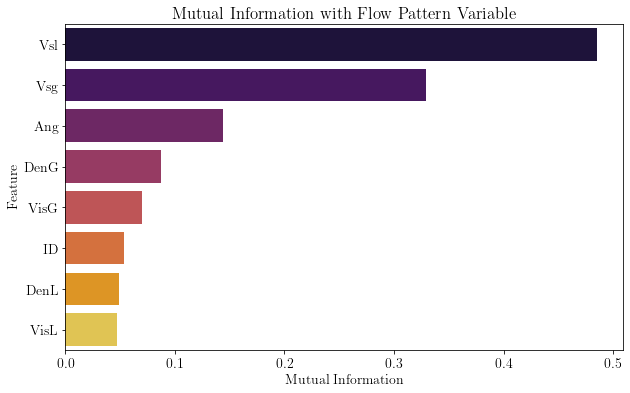

In [301]:
from sklearn.feature_selection import mutual_info_classif

# Assuming df is your DataFrame and 'Flow_label' is your target variable

# Prepare your features and target variable
X = df.drop(columns=['Author', 'ST', 'Flow_label'])
# consider the effect of ST
#X = df.drop(columns=['Author', 'Flow_label'])
y = df['Flow_label']

# Calculate Mutual Information
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame for easier plotting
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})

# Sort the DataFrame by Mutual Information scores
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
# Set the font size
plt.rcParams['font.size'] = 14
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette='inferno')
plt.title('Mutual Information with Flow Pattern Variable')
plt.show()

In [302]:
# Split the dataset into train and test sets
# Features
X = df.drop(columns=['Author', 'ST','Flow_label'], axis=1) 
# consider ST effect    
#X = df.drop(columns=['Author','Flow_label'], axis=1) 
# Target variable
y = df['Flow_label']                          
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = pd.concat([X_train, y_train], axis=1)
print('everything is fine sofar!')

everything is fine sofar!


In [303]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]}

# Initialize SVC with RBF kernel
svc_classifier = SVC(kernel='linear', max_iter=20000)

# Initialize GridSearchCV
grid_search = GridSearchCV(svc_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best score
best_score = grid_search.best_score_
print(f"Best score: {best_score}")


Best parameters: {'C': 0.1, 'gamma': 'scale'}
Best score: 0.7349293929430735


In [304]:
# Imbalanced data --> use different techniques 
# Using different classifiers 
# Initialize different classifiers
classifiers = {
    'XGBClassifier': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=20000),
    'Support Vector Machine': SVC(kernel='linear', C=0.1, gamma='scale', max_iter=20000)
}
# Generate y_pred for each classifier
y_preds = {}
# Initialize a list to store the results of accuracy
results = []
models_accuracies=[]
# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_preds[clf_name] = y_pred

    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred) * 100  # Multiply by 100 for percentage
    results.append([clf_name, f"{accuracy:.2f}%"])
    models_accuracies.append([clf_name, accuracy])


In [305]:
# Print results as a table
print('Mutliclass accuracy:')
print(tabulate(results, headers=["Model", "Accuracy"], tablefmt="pretty"))

Mutliclass accuracy:
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|     XGBClassifier      |  94.61%  |
|     Decision Tree      |  91.91%  |
|     Random Forest      |  94.61%  |
|  Logistic Regression   |  74.33%  |
| Support Vector Machine |  75.89%  |
+------------------------+----------+


In [306]:
# Initialize a KFold object with k=5 (5-fold cross-validation)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store results
results = []

# Perform k-fold cross-validation for each classifier
for clf_name, clf in classifiers.items():
    cv_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        # Train the model on the training data
        clf.fit(X_train_cv, y_train_cv)

        # Make predictions on the test data
        y_pred_cv = clf.predict(X_test_cv)

        # Calculate accuracy and store the score
        accuracy = accuracy_score(y_test_cv, y_pred_cv)
        cv_scores.append(accuracy)
    
    # Calculate average cross-validation score
    average_score = sum(cv_scores) / len(cv_scores)
    
    # Store the result
    results.append([clf_name, average_score])



In [307]:
# Print the results as a table
print('Cross validation:')
print(tabulate(results, headers=['Classifier', 'Average Score'], tablefmt='pretty'))


Cross validation:
+------------------------+--------------------+
|       Classifier       |   Average Score    |
+------------------------+--------------------+
|     XGBClassifier      | 0.9548649562194178 |
|     Decision Tree      | 0.9349946883852691 |
|     Random Forest      | 0.9560061485964461 |
|  Logistic Regression   | 0.745098023435488  |
| Support Vector Machine | 0.7556061679114086 |
+------------------------+--------------------+


In [308]:
# Define original labels and desired labels
original_labels = ['0', '1', '2', '3', '4']
desired_labels = ['SS', 'SW', 'A', 'I', 'DB']
#desired_labels = ['Smooth-Stratified', 'Wavy-Stratified', 'Annular', 'Slug', 'Bubbly']
# Create a dictionary to map original labels to desired labels
label_mapping = {original_labels[i]: desired_labels[i] for i in range(len(original_labels))}



Confusion Matrix:


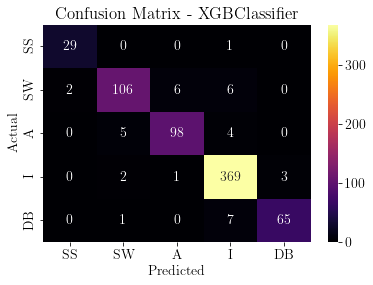

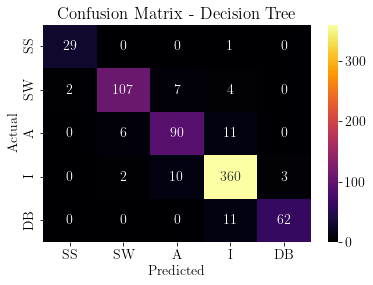

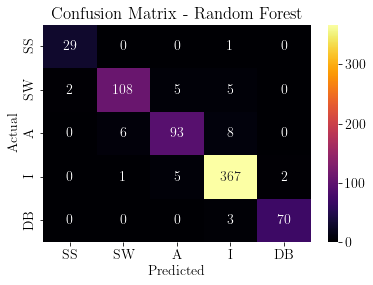

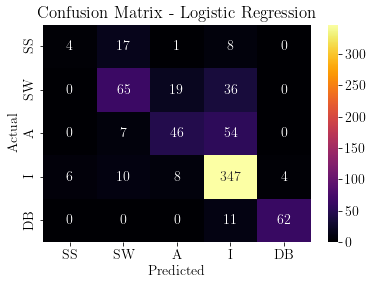

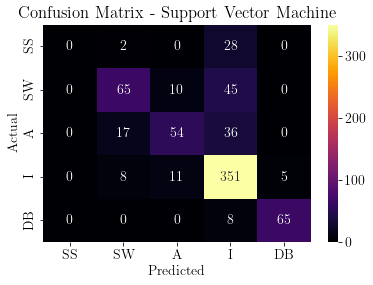

In [309]:

# Initialize a dictionary to store confusion matrices
confusion_matrices = {}

for name, y_pred in y_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

print('Confusion Matrix:')
# Plot the confusion matrices
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', xticklabels=desired_labels, yticklabels=desired_labels) # Reverse yticklabels
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    # Create the confusion matrix using scikit-learn
    cm = confusion_matrix(y_test, y_pred)
    # Calculate row sums (total predictions for each class)
    row_sums = np.sum(cm, axis=1)
    # Calculate percentages
    percentages = cm / row_sums[:, np.newaxis] * 100  # Ensure division is element-wise
    #sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=desired_labels, yticklabels=desired_labels) # Reverse yticklabels

   

Confusion Matrix:


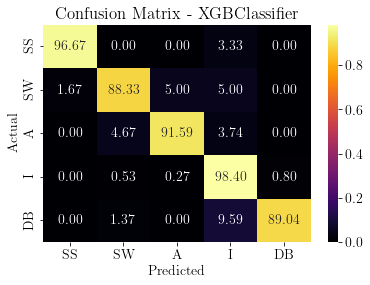

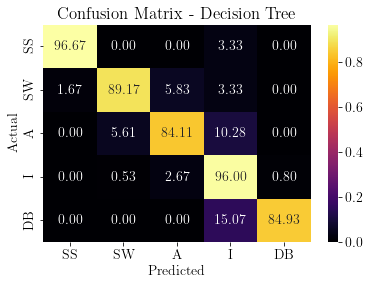

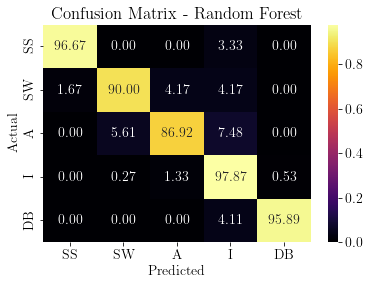

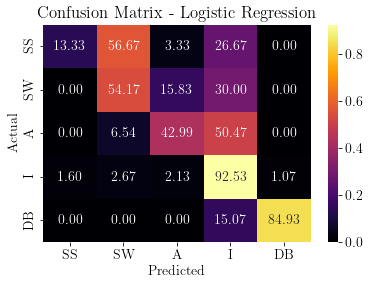

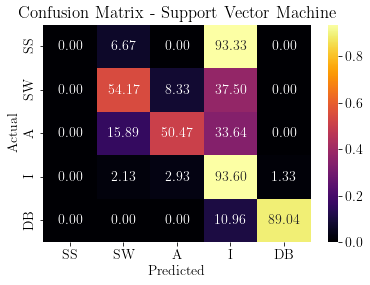

In [310]:
# Confusion matrix in %
# Initialize a dictionary to store confusion matrices
confusion_matrices = {}

for name, y_pred in y_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    confusion_matrices[name] = cm_normalized

print('Confusion Matrix:')
# Plot the confusion matrices
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='.2%', cmap='inferno', xticklabels=desired_labels, yticklabels=desired_labels) # Reverse yticklabels
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Confusion Matrix:


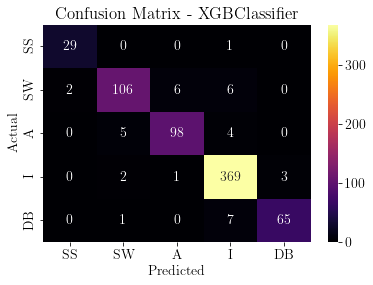

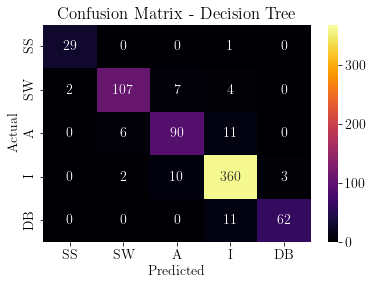

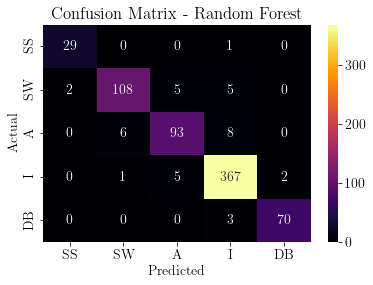

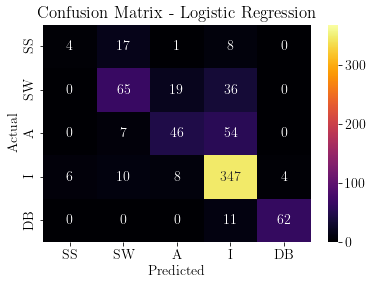

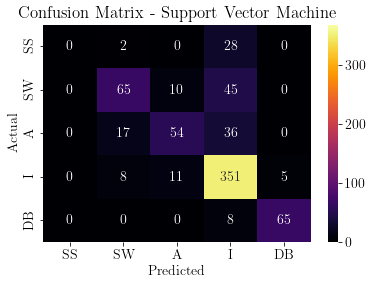

In [311]:
# Initialize a dictionary to store confusion matrices
confusion_matrices = {}

for name, y_pred in y_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

# Find the maximum value among all confusion matrices
max_value = max(np.max(cm) for cm in confusion_matrices.values())

print('Confusion Matrix:')
# Plot the confusion matrices
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', xticklabels=desired_labels, yticklabels=desired_labels, vmin=0, vmax=max_value) # Reverse yticklabels
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    # Create the confusion matrix using scikit-learn
    cm = confusion_matrix(y_test, y_pred)
    # Calculate row sums (total predictions for each class)
    row_sums = np.sum(cm, axis=1)
    # Calculate percentages
    percentages = cm / row_sums[:, np.newaxis] * 100  # Ensure division is element-wise
    #sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=desired_labels, yticklabels=desired_labels) # Reverse yticklabels


In [312]:
# Initialize a dictionary to store classification reports
classification_reports = {}
tables = []
for clf_name, y_pred in y_preds.items():
    # Generate the classification report
    report = classification_report(y_test, y_pred, target_names=desired_labels, zero_division=1, output_dict=True)
    
    # Calculate Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    
    # Convert the report dictionary to a table
    table = []
    for label, metrics in report.items():
        if isinstance(metrics, float):
            precision = recall = f1_score = support = metrics
        else:
            precision = metrics.get('precision', '')
            recall = metrics.get('recall', '')
            f1_score = metrics.get('f1-score', '')
            support = metrics.get('support', '')
        
        table.append([label, precision, recall, f1_score, support])
        
    # Add a header to the table
    headers = ["Label", "Precision", "Recall", "F1-Score", "Support"]    
    # Add classifier name and kappa score as title
    tables.append((clf_name, kappa, table, headers))
    
    
    

# Print the tables
for classifier, kappa, table, headers in tables:
    print(f"Classifier: {classifier}, Cohen's Kappa: {kappa}")
    print(tabulate(table, headers, tablefmt="pretty"))

    print("\n")

Classifier: XGBClassifier, Cohen's Kappa: 0.9165657087866057
+--------------+--------------------+--------------------+--------------------+--------------------+
|    Label     |     Precision      |       Recall       |      F1-Score      |      Support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      SS      | 0.9354838709677419 | 0.9666666666666667 | 0.9508196721311476 |        30.0        |
|      SW      | 0.9298245614035088 | 0.8833333333333333 | 0.905982905982906  |       120.0        |
|      A       | 0.9333333333333333 | 0.9158878504672897 | 0.9245283018867924 |       107.0        |
|      I       | 0.9534883720930233 |       0.984        | 0.9685039370078741 |       375.0        |
|      DB      | 0.9558823529411765 | 0.8904109589041096 | 0.9219858156028369 |        73.0        |
|   accuracy   | 0.9460992907801419 | 0.9460992907801419 | 0.9460992907801419 | 0.9460992907801419 |
|  macro avg   | 0.94160249814

In [313]:
# Get class probabilities for the input data
model = classifiers['Decision Tree']
model = classifiers['XGBClassifier']
model = classifiers['Random Forest']
# Get class probabilities for the input data
predicted_probabilities = model.predict_proba(X_test)
# Display long output with scrolling
display(HTML("<div style='max-height: 300px; overflow-y: auto;'>"  + "</div>"))
print(model)
# Get the index of the maximum probability for each prediction
max_prob_indices = np.argmax(predicted_probabilities, axis=1)

# Get the corresponding patterns
corresponding_patterns = [y_pred[index] for index in max_prob_indices]

# Get the maximum probabilities
max_probabilities = [predicted_probabilities[i, index] for i, index in enumerate(max_prob_indices)]

# Print the list of maximum probabilities and their corresponding patterns
for pattern, probability in zip(corresponding_patterns, max_probabilities):
    print(f"Pattern: {pattern}, Max Probability: {probability:.4f}")

RandomForestClassifier()
Pattern: 3, Max Probability: 0.9300
Pattern: 3, Max Probability: 1.0000
Pattern: 1, Max Probability: 0.8600
Pattern: 3, Max Probability: 0.9800
Pattern: 1, Max Probability: 0.8300
Pattern: 3, Max Probability: 0.9300
Pattern: 3, Max Probability: 0.9800
Pattern: 3, Max Probability: 1.0000
Pattern: 3, Max Probability: 0.9700
Pattern: 3, Max Probability: 0.8100
Pattern: 3, Max Probability: 0.9900
Pattern: 1, Max Probability: 0.8500
Pattern: 1, Max Probability: 1.0000
Pattern: 3, Max Probability: 0.8500
Pattern: 3, Max Probability: 1.0000
Pattern: 3, Max Probability: 0.9900
Pattern: 3, Max Probability: 1.0000
Pattern: 1, Max Probability: 1.0000
Pattern: 3, Max Probability: 0.9900
Pattern: 3, Max Probability: 1.0000
Pattern: 3, Max Probability: 1.0000
Pattern: 3, Max Probability: 0.9600
Pattern: 3, Max Probability: 0.9400
Pattern: 3, Max Probability: 1.0000
Pattern: 3, Max Probability: 0.9900
Pattern: 3, Max Probability: 1.0000
Pattern: 3, Max Probability: 0.9900
Pat

In [314]:
# list of models and their corresponding accuracies: models_accuracies
# Filter models with accuracy > 80%
selected_models = [model_info for model_info in models_accuracies if model_info[1] > 85]

# Print the selected models
for model_info in selected_models:
    print(f"Model: {model_info[0]}, Accuracy: {model_info[1]:.2f}%")

# Initialize a dictionary to store models with accuracy > 90%
high_accuracy_models = {}


# Iterate through the models
for model_name, model in classifiers.items():
    for model_info in selected_models:
        if (model_info[0] == model_name):
            high_accuracy_models[model_name] = model



Model: XGBClassifier, Accuracy: 94.61%
Model: Decision Tree, Accuracy: 91.91%
Model: Random Forest, Accuracy: 94.61%


In [315]:
# the selected models are already trained these models
# Load the new data set
validation_data = pd.read_csv('validation_data.csv')  
# Features
X_valid = df.drop(columns=['Author', 'ST', 'Flow_label'], axis=1) 
# consider the effect of ST (surface tension)   
#X_valid = df.drop(columns=['Author', 'Flow_label'], axis=1)    

# Target variable
y_valid = df['Flow_label'] 

# Initialize a dictionary to store predictions
predictions_dict = {}

# Loop through the selected models
for model_name, model in high_accuracy_models.items():
    # Make predictions
    predictions = model.predict(X_valid)
    
    # Store predictions in the dictionary
    predictions_dict[model_name] = predictions

#  predictions stored in predictions_dict
for model_name, predictions in predictions_dict.items():
    accuracy = accuracy_score(y_valid, predictions)
    print(f"Accuracy for {model_name}: {accuracy*100 :.2f} %")

Accuracy for XGBClassifier: 99.29 %
Accuracy for Decision Tree: 99.18 %
Accuracy for Random Forest: 99.38 %


In [316]:
# Get class probabilities for the input data
model = classifiers['Decision Tree']
model = classifiers['XGBClassifier']
model = classifiers['Random Forest']
predicted_probabilities = model.predict_proba(X_test)
# Display long output with scrolling
display(HTML("<div style='max-height: 300px; overflow-y: auto;'>"  + "</div>"))
print(model)
# Get the index of the maximum probability for each prediction
max_prob_indices = np.argmax(predicted_probabilities, axis=1)

# Get the corresponding patterns
corresponding_patterns = [y_pred[index] for index in max_prob_indices]

# Get the maximum probabilities
max_probabilities = [predicted_probabilities[i, index] for i, index in enumerate(max_prob_indices)]

# Print the list of maximum probabilities and their corresponding patterns
# find the greatest probability, for which the pattern prediction is different from the actual
# Initialize variables to keep track of maximum false prediction probability
max_false_prediction_probability = 0.0
for pattern,actual, probability in zip(corresponding_patterns, y_test, max_probabilities):
    print(f"Pattern: {pattern}, {actual}, Max Probability: {probability:.2f}") 
    if pattern != actual:
        if probability > max_false_prediction_probability:
            max_false_prediction_probability = probability

if max_false_prediction_probability > 0.0:
    print(f"The maximum false prediction probability is {max_false_prediction_probability:.4f}")
else:
    print("No false predictions found.")



RandomForestClassifier()
Pattern: 3, 3, Max Probability: 0.93
Pattern: 3, 3, Max Probability: 1.00
Pattern: 1, 2, Max Probability: 0.86
Pattern: 3, 3, Max Probability: 0.98
Pattern: 1, 2, Max Probability: 0.83
Pattern: 3, 1, Max Probability: 0.93
Pattern: 3, 0, Max Probability: 0.98
Pattern: 3, 3, Max Probability: 1.00
Pattern: 3, 3, Max Probability: 0.97
Pattern: 3, 1, Max Probability: 0.81
Pattern: 3, 1, Max Probability: 0.99
Pattern: 1, 2, Max Probability: 0.85
Pattern: 1, 2, Max Probability: 1.00
Pattern: 3, 0, Max Probability: 0.85
Pattern: 3, 3, Max Probability: 1.00
Pattern: 3, 1, Max Probability: 0.99
Pattern: 3, 3, Max Probability: 1.00
Pattern: 1, 2, Max Probability: 1.00
Pattern: 3, 1, Max Probability: 0.99
Pattern: 3, 3, Max Probability: 1.00
Pattern: 3, 3, Max Probability: 1.00
Pattern: 3, 1, Max Probability: 0.96
Pattern: 3, 3, Max Probability: 0.94
Pattern: 3, 3, Max Probability: 1.00
Pattern: 3, 3, Max Probability: 0.99
Pattern: 3, 1, Max Probability: 1.00
Pattern: 3, 3

In [317]:
for name, model in classifiers.items():
    print(model)
    joblib.dump(model, name)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
DecisionTreeClassifier()
RandomForestClassifier()
LogisticRegression(max_iter=20000)
SVC(C=0.1, kernel='linear', max_iter=20000)


In [322]:
import os

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    
# Define the path to the test directory relative to the notebooks directory
test_dir = os.path.join(os.path.dirname(os.getcwd()), 'test')

# Ensure the test directory exists
os.makedirs(test_dir, exist_ok=True)
# Save the models in the test directory
for name, model in classifiers.items():
    model_path = os.path.join(test_dir, f'{name}.joblib')
    joblib.dump(model, model_path)
    print(f"Model {name} saved to {model_path}")

Model XGBClassifier saved to c:\Users\Administrator\Desktop\mini_project\test\XGBClassifier.joblib
Model Decision Tree saved to c:\Users\Administrator\Desktop\mini_project\test\Decision Tree.joblib
Model Random Forest saved to c:\Users\Administrator\Desktop\mini_project\test\Random Forest.joblib
Model Logistic Regression saved to c:\Users\Administrator\Desktop\mini_project\test\Logistic Regression.joblib
Model Support Vector Machine saved to c:\Users\Administrator\Desktop\mini_project\test\Support Vector Machine.joblib
